In [8]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install statsmodels



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## EXPLORATORY ANALYSIS

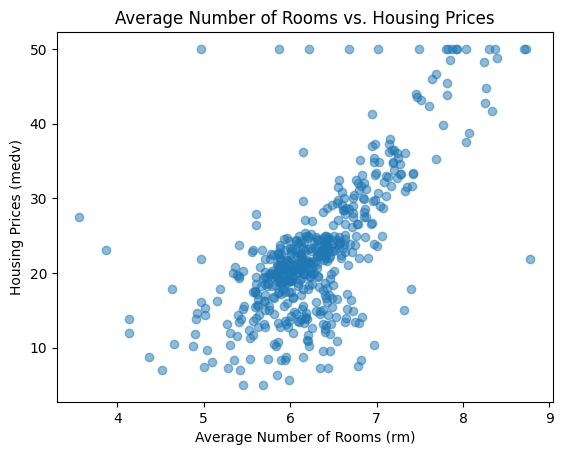

In [11]:
# Scatter plot of average number of rooms vs. housing prices
plt.scatter(X['rm'], Y, alpha=0.5)
plt.title('Average Number of Rooms vs. Housing Prices')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Housing Prices (medv)')
plt.show()

 ## IMPORT THE DATASET

In [15]:
# Load the dataset from a CSV file
data = pd.read_csv("housing_data.csv")
total_rows = len(data) 

# [...] Exploratory Analysis [...]

# Set the random seed based on the last 4 digits of the student number
student_number = 964
seed = int(str(student_number)) 
np.random.seed(seed)

# Get total rows and define the training set size
total_rows = len(data)
train_size = int(0.9 * total_rows)

# Sample the training set indices (90% of the data)
train_indices = np.random.choice(total_rows, train_size, replace=False)

# Get the test set indices (remaining 10% of the data)
all_indices = list(range(total_rows))
test_indices = [i for i in all_indices if i not in train_indices]

# Select the training and test sets using the indices
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

## SPLIT THE DATASET INTO A TRAINING SET (90%) AND A TEST SET (10%) TO PREPARE FOR MODEL TRAINING AND EVALUATON.


In [16]:
# Load the dataset
data = pd.read_csv("housing_data.csv")

# Verify the data structure
print("Dataset Overview:")
print(data.head())

# Define the random seed based onstudent ID
student_id = 964  
seed = int(str(student_id))  
np.random.seed(seed)

# Calculate the size of the training set (90%)
total_rows = len(data)
train_size = int(0.9 * total_rows)

# Generate training and test indices
train_indices = np.random.choice(total_rows, train_size, replace=False)
test_indices = [i for i in range(total_rows) if i not in train_indices]

# Split the dataset
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

# Verify the splits
print("\nTraining Data Overview:")
print(train_data.head())
print(f"Training set size: {len(train_data)} rows")

print("\nTest Data Overview:")
print(test_data.head())
print(f"Test set size: {len(test_data)} rows")


Dataset Overview:
      crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  lstat  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   4.98   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   9.14   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   4.03   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   2.94   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   5.33   

   medv  
0  24.0  
1  21.6  
2  34.7  
3  33.4  
4  36.2  

Training Data Overview:
        crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
78   0.05646   0.0  12.83  0.437  6.232  53.7  5.0141    5  398     18.7   
210  0.17446   0.0  10.59  0.489  5.960  92.1  3.8771    4  277     18.6   
319  0.47547   0.0   9.90  0.544  6.113  58.8  4.0019    4  304     18.4   
97   0.12083   0.0   2.89  0.445  8.069  76.0  3.4952    2  276     18.0   
6    0.08829  12.5   7.87  0.5

## BOOTSTRAP PROCEDURE

In [19]:
# Load dataset
data = pd.read_csv("housing_data.csv")

# Split into predictors (X) and target (Y)
X = data.drop(columns=['medv'])  # Replace 'medv' with the actual target column name
Y = data['medv']

# Split data into training (90%) and test (10%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1234)

# Get the training indices for resampling
train_indices = X_train.index

# Initialize the bootstrap procedure
n_iterations = 1000  # Number of bootstrap iterations
bootstrap_coeffs = []  # List to store the coefficients for each iteration

for _ in range(n_iterations):
    
    # Resample training data with replacement
    sample_indices = np.random.choice(train_indices, size=len(train_indices), replace=True)

    # Resample predictors and target using the sampled indices
    X_resampled = X_train.loc[sample_indices]
    Y_resampled = Y_train.loc[sample_indices]

    # Fit the model on the resampled data using statsmodels
    model = sm.OLS(Y_resampled, sm.add_constant(X_resampled)).fit()

    # Store the coefficients (beta) from this iteration
    bootstrap_coeffs.append(model.params)

